Binary knapsack problem is defined as, “Given a set of items having some weight and value/profit associated with it. The knapsack problem is to find the set of items such that the total weight is less than or equal to a given limit (size of knapsack) and the total value/profit earned is as large as possible.”

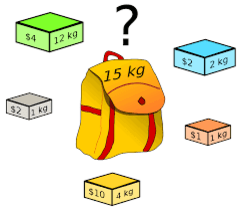

**Problem Statement:**

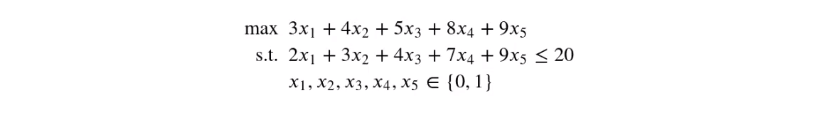

In [1]:
!pip install Pyomo

     ---------------------------------------- 3.9/3.9 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 49.6/49.6 kB 1.3 MB/s eta 0:00:00


In [6]:
import pyomo.environ as pe
import pyomo.opt as po

In [7]:
solver = po.SolverFactory('glpk')

In [9]:
model = pe.ConcreteModel()

In [10]:
model.x1 = pe.Var(domain=pe.Binary)
model.x2 = pe.Var(domain=pe.Binary)
model.x3 = pe.Var(domain=pe.Binary)
model.x4 = pe.Var(domain=pe.Binary)
model.x5 = pe.Var(domain=pe.Binary)

In [11]:
obj_expr = 3 * model.x1 + 4 * model.x2 + 5 * model.x3 + 8 * model.x4 + 9 * model.x5

In [12]:
model.obj = pe.Objective(sense = pe.maximize, expr = obj_expr)

In [13]:
con_expr = 2 * model.x1 + 3 * model.x2 + 4 * model.x3 + 5 * model.x4 + 9 * model.x5 <= 20

In [14]:
model.con = pe.Constraint(expr = con_expr)

In [2]:
!pip install pyutilib

     -------------------------------------- 254.2/254.2 kB 1.2 MB/s eta 0:00:00


In [15]:
from pyutilib.services import register_executable, registered_executable
register_executable(name='glpsol')

In [16]:
result = solver.solve(model)

In [18]:
print(pe.value(model.x1))
print(pe.value(model.x2))
print(pe.value(model.x3))
print(pe.value(model.x4))
print(pe.value(model.x5))
print(pe.value(model.obj))

1.0
0.0
1.0
1.0
1.0
25.0
